# *Convolution Neural Network | Project 1 | Plant Seedling Classification*


## *About Case:*

Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment.

## *About Dataset:*

The Plant Seedlings Dataset contains images of approximately 960 unique plants belonging to 12 species at several growth stages. It comprises annotated RGB images with a physical resolution of roughly 10 pixels per mm. The database have been recorded at Aarhus University Flakkebjerg Research station in a collaboration between University of Southern Denmark and Aarhus University.

##*Connecting Google Drive with Colab*

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Key Libraries

In [0]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# To read Zip File
from zipfile import ZipFile

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import toimage

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# For time based calculations
import time

# Import TensorFlow and Keras
import tensorflow as tf
import keras

# Import Open CV - For Image Processing
import cv2

# Import Modules from Keras for CNN Modeling
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, Activation, Flatten, Reshape
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.optimizers import adam

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed(40)

##*Collect Data and Append Train and Test Specific Format*

*1. Set Base OS Directory*

In [0]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1')

*2. Extract Train and Test Data from ZIP Files*

In [0]:
# with ZipFile('train.zip', 'r') as z:
#   z.extractall()

In [0]:
# with ZipFile('test.zip', 'r') as z:
#   z.extractall()

*3. Create Training Set - Train Image & Training Labels*

In [7]:
# Change Directory to extracted train image folder
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1/train')
os.listdir()

['Fat Hen',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Sugar beet',
 'Shepherds Purse',
 'Charlock',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Maize',
 'Common Chickweed',
 'Common wheat']

In [8]:
trainX = []
trainY = []
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    trainX.append(dummy)
                    trainY.append(i)
                except Exception as e:
                    print(e)

Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


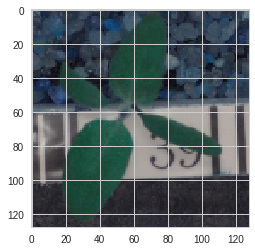

In [9]:
# Image Visualization - Training Image

plt.imshow(trainX[0])

In [10]:
# Label Visualization - Training Label
trainY[0]

'Fat Hen'

*4. Create Test Set - Test Images*

In [0]:
# Change Directory to extracted test image folder
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1/test')

In [0]:
testX=[]

for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(128,128))
    testX.append(dummy)

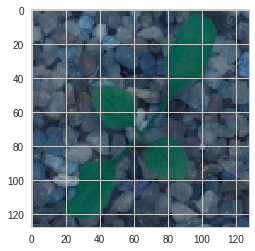

In [13]:
# Image Visualization - Test Image

plt.imshow(testX[0])

In [0]:
#Return Back to Base Directory
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1')

##*Understanding and Pre Processing of Data*

*1. Understand Shape of Train Set (trainX) and test set (testX)*

In [15]:
print("Training Object Shape:")
print("Train X:",trainX[0].shape)

print("Testing Object Shape:")
print("Test X:",testX[0].shape)

Training Object Shape:
Train X: (128, 128, 3)
Testing Object Shape:
Test X: (128, 128, 3)


*2. One Hot Encoding for Train Y*

In [16]:
# Label Encode the Labels
le = preprocessing.LabelEncoder()
le.fit(trainY)

LabelEncoder()

In [17]:
# One hot encoding for output label
trainY = pd.get_dummies(trainY)
print("Train Y:",trainY.shape,"\n")

Train Y: (4750, 12) 



*3. Converting the data into np.array*

In [0]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)

##*Prepare the pre-processed data for Modeling and Validation*

*1. Splitting Training Data into further Train and Validation Split for Internal Model Development and Validations*

In [19]:
x_train2, x_val, y_train2, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=2)
print("Shape of Training Set:",x_train2.shape)
print("Shape of Training Labels:",y_train2.shape)
print("Shape of Validation Set:",x_val.shape)
print("Shape of Validation Label:",y_val.shape)

Shape of Training Set: (3800, 128, 128, 3)
Shape of Training Labels: (3800, 12)
Shape of Validation Set: (950, 128, 128, 3)
Shape of Validation Label: (950, 12)


*2. Reshape the Dataset*

In [20]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)

print("Shape of Training Set:",x_train2.shape)
print("Shape of Training Labels:",y_train2.shape)
print("Shape of Validation Set:",x_val.shape)
print("Shape of Validation Label:",y_val.shape)

Shape of Training Set: (3800, 128, 128, 3)
Shape of Training Labels: (3800, 12)
Shape of Validation Set: (950, 128, 128, 3)
Shape of Validation Label: (950, 12)


##*Build & Execute the CNN Graph on Splitted Data*

*1. Vanilla CNN - Developing Basic CNN Model*

In [0]:
TRAIN = False
BATCH_SIZE = 64
EPOCHS = 10

In [25]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(128, 128, 3)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(12))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train2, y_train2, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_val, y_val), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.
Train on 3800 samples, validate on 950 samples
Epoch 1/10
3800/3800 [==============================] - 15s 4ms/step - loss: 15.0846 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 2/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.1128 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 3/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.1128 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 4/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.1128 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 5/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.1128 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 6/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.1128 - acc: 0.0624 - val_loss: 15.2698 - val_acc: 0.0526
Epoch 7/10
3800/3800 [==============================] - 11s 3ms/step - loss: 15.112

In [27]:
# Model Accuracy
score_train = model2.evaluate(x_train2, y_train2)
score_test = model2.evaluate(x_val, y_val)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

950/950 [==============================] - 1s 769us/step

Training accuracy:  0.06236842106047429
Test accuracy:  0.052631579010110154


We can see that basic CNN model gives very poor accuracy on Plant Seedling dataset

*2. Let us add Pooling and Dropout in our Graph and see how well the it performs*

In [28]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(128, 128, 3)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(12))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train2, y_train2, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_val, y_val), callbacks=callback_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 3800 samples, validate on 950 samples
Epoch 1/10
3800/3800 [==============================] - 8s 2ms/step - loss: 14.4964 - acc: 0.0997 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 2/10
3800/3800 [==============================] - 7s 2ms/step - loss: 14.5190 - acc: 0.0992 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 3/10
3800/3800 [==============================] - 7s 2ms/step - loss: 14.5275 - acc: 0.0987 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 4/10
3800/3800 [==============================] - 7s 2ms/step - loss: 14.5190 - acc: 0.0992 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 5/10
3800/3800 [==============================] - 7s 2ms/step - loss: 14.5317 - acc: 0.0984 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 6/10
3800/3800 [==============================] - 7s 2ms/step - loss: 14.5233 - acc: 0.0989 - val_loss: 14.2179 - val_acc: 0.1179
Epoch 7/10
3800/3800 [

In [29]:
# Model Accuracy
score_train = model3.evaluate(x_train2, y_train2)
score_test = model3.evaluate(x_val, y_val)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

950/950 [==============================] - 1s 584us/step

Training accuracy:  0.10105263157894737
Test accuracy:  0.1178947369989596


We can se a li't improvement on our basic model but still thew accuracy is poor

*3. Finally developing a more Sophisticated Model with batch normalization, padding etc*

In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.6))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 12, activation = 'softmax')) 

# Loss and Optimizer
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 64)        0         
__________

In [34]:
TRAIN = False
BATCH_SIZE = 64
EPOCHS = 30

# Train the CNN Model
model.fit(x_train2, y_train2, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_val, y_val))

Train on 3800 samples, validate on 950 samples
Epoch 1/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.8163 - acc: 0.7311 - val_loss: 0.9798 - val_acc: 0.6958
Epoch 2/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.7229 - acc: 0.7547 - val_loss: 0.8785 - val_acc: 0.7411
Epoch 3/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.7008 - acc: 0.7629 - val_loss: 0.8346 - val_acc: 0.7295
Epoch 4/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.6850 - acc: 0.7684 - val_loss: 0.7359 - val_acc: 0.7684
Epoch 5/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.6229 - acc: 0.7905 - val_loss: 0.7732 - val_acc: 0.7653
Epoch 6/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.6414 - acc: 0.7863 - val_loss: 0.7505 - val_acc: 0.7621
Epoch 7/20
3800/3800 [==============================] - 7s 2ms/step - loss: 0.5269 - acc: 0.8145 - val_loss: 0.6494 - val_acc: 0.7884
Epoch 8/20
3800

In [35]:
#Model prediction
prediction_1 = model.predict(x_val)

# Model Accuracy
score_train = model.evaluate(x_train2, y_train2)
score_test = model.evaluate(x_val, y_val)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

950/950 [==============================] - 1s 662us/step

Training accuracy:  0.9460526314534639
Test accuracy:  0.8378947363401714


We can see that after developing a soppisticated CNN - we're able to achieve better accuracy

##*Using the same graph Build Model on Actual Training Data and Develop Prediction for Given Test Data*

In [36]:
TRAIN = False
BATCH_SIZE = 64
EPOCHS = 30

# Train the CNN Model
model.fit(trainX, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS)

Epoch 1/30
4750/4750 [==============================] - 9s 2ms/step - loss: 0.4282 - acc: 0.8594
Epoch 2/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.3791 - acc: 0.8707
Epoch 3/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.3261 - acc: 0.8851
Epoch 4/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2914 - acc: 0.8947
Epoch 5/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.3024 - acc: 0.8943
Epoch 6/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2987 - acc: 0.8952
Epoch 7/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2935 - acc: 0.8964
Epoch 8/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2727 - acc: 0.9006
Epoch 9/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2792 - acc: 0.8968
Epoch 10/30
4750/4750 [==============================] - 8s 2ms/step - loss: 0.2463 - acc: 0.9118
Epoch 11/30
4750/4750 [======

In [0]:
#Model prediction
prediction_test_data = model.predict(testX)

In [0]:
#Model Class prediction
predict_class = model.predict_classes(testX)

In [0]:
# # At present prediction is in one hot encoded format - lets bring it back to original class
# predict_array = pd.DataFrame(prediction_test_data)
# predict_class = predict_array.idxmax(axis=1)

In [0]:
# Change Directory to extracted train image folder
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1/test')

In [41]:
#Create a  DataFrame with the Image ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'file':os.listdir(),'species':predict_class})
submission.head()

,file,species
0,c0461776c.png,3
1,4bbfd1e05.png,2
2,1d0cbd819.png,6
3,93079d970.png,11
4,856f2910a.png,10


In [0]:
submission['species'] = le.inverse_transform(submission['species'])

In [0]:
# Change Directory to extracted train image folder
os.chdir('/content/gdrive/My Drive/Colab Notebooks/AIML/Residency 7/CNN_Project1')
submission.to_csv("submission.csv")

Submitted to Kaggle - Received a score of 0.86523